ivt
pcpt
freezing_level
uv925


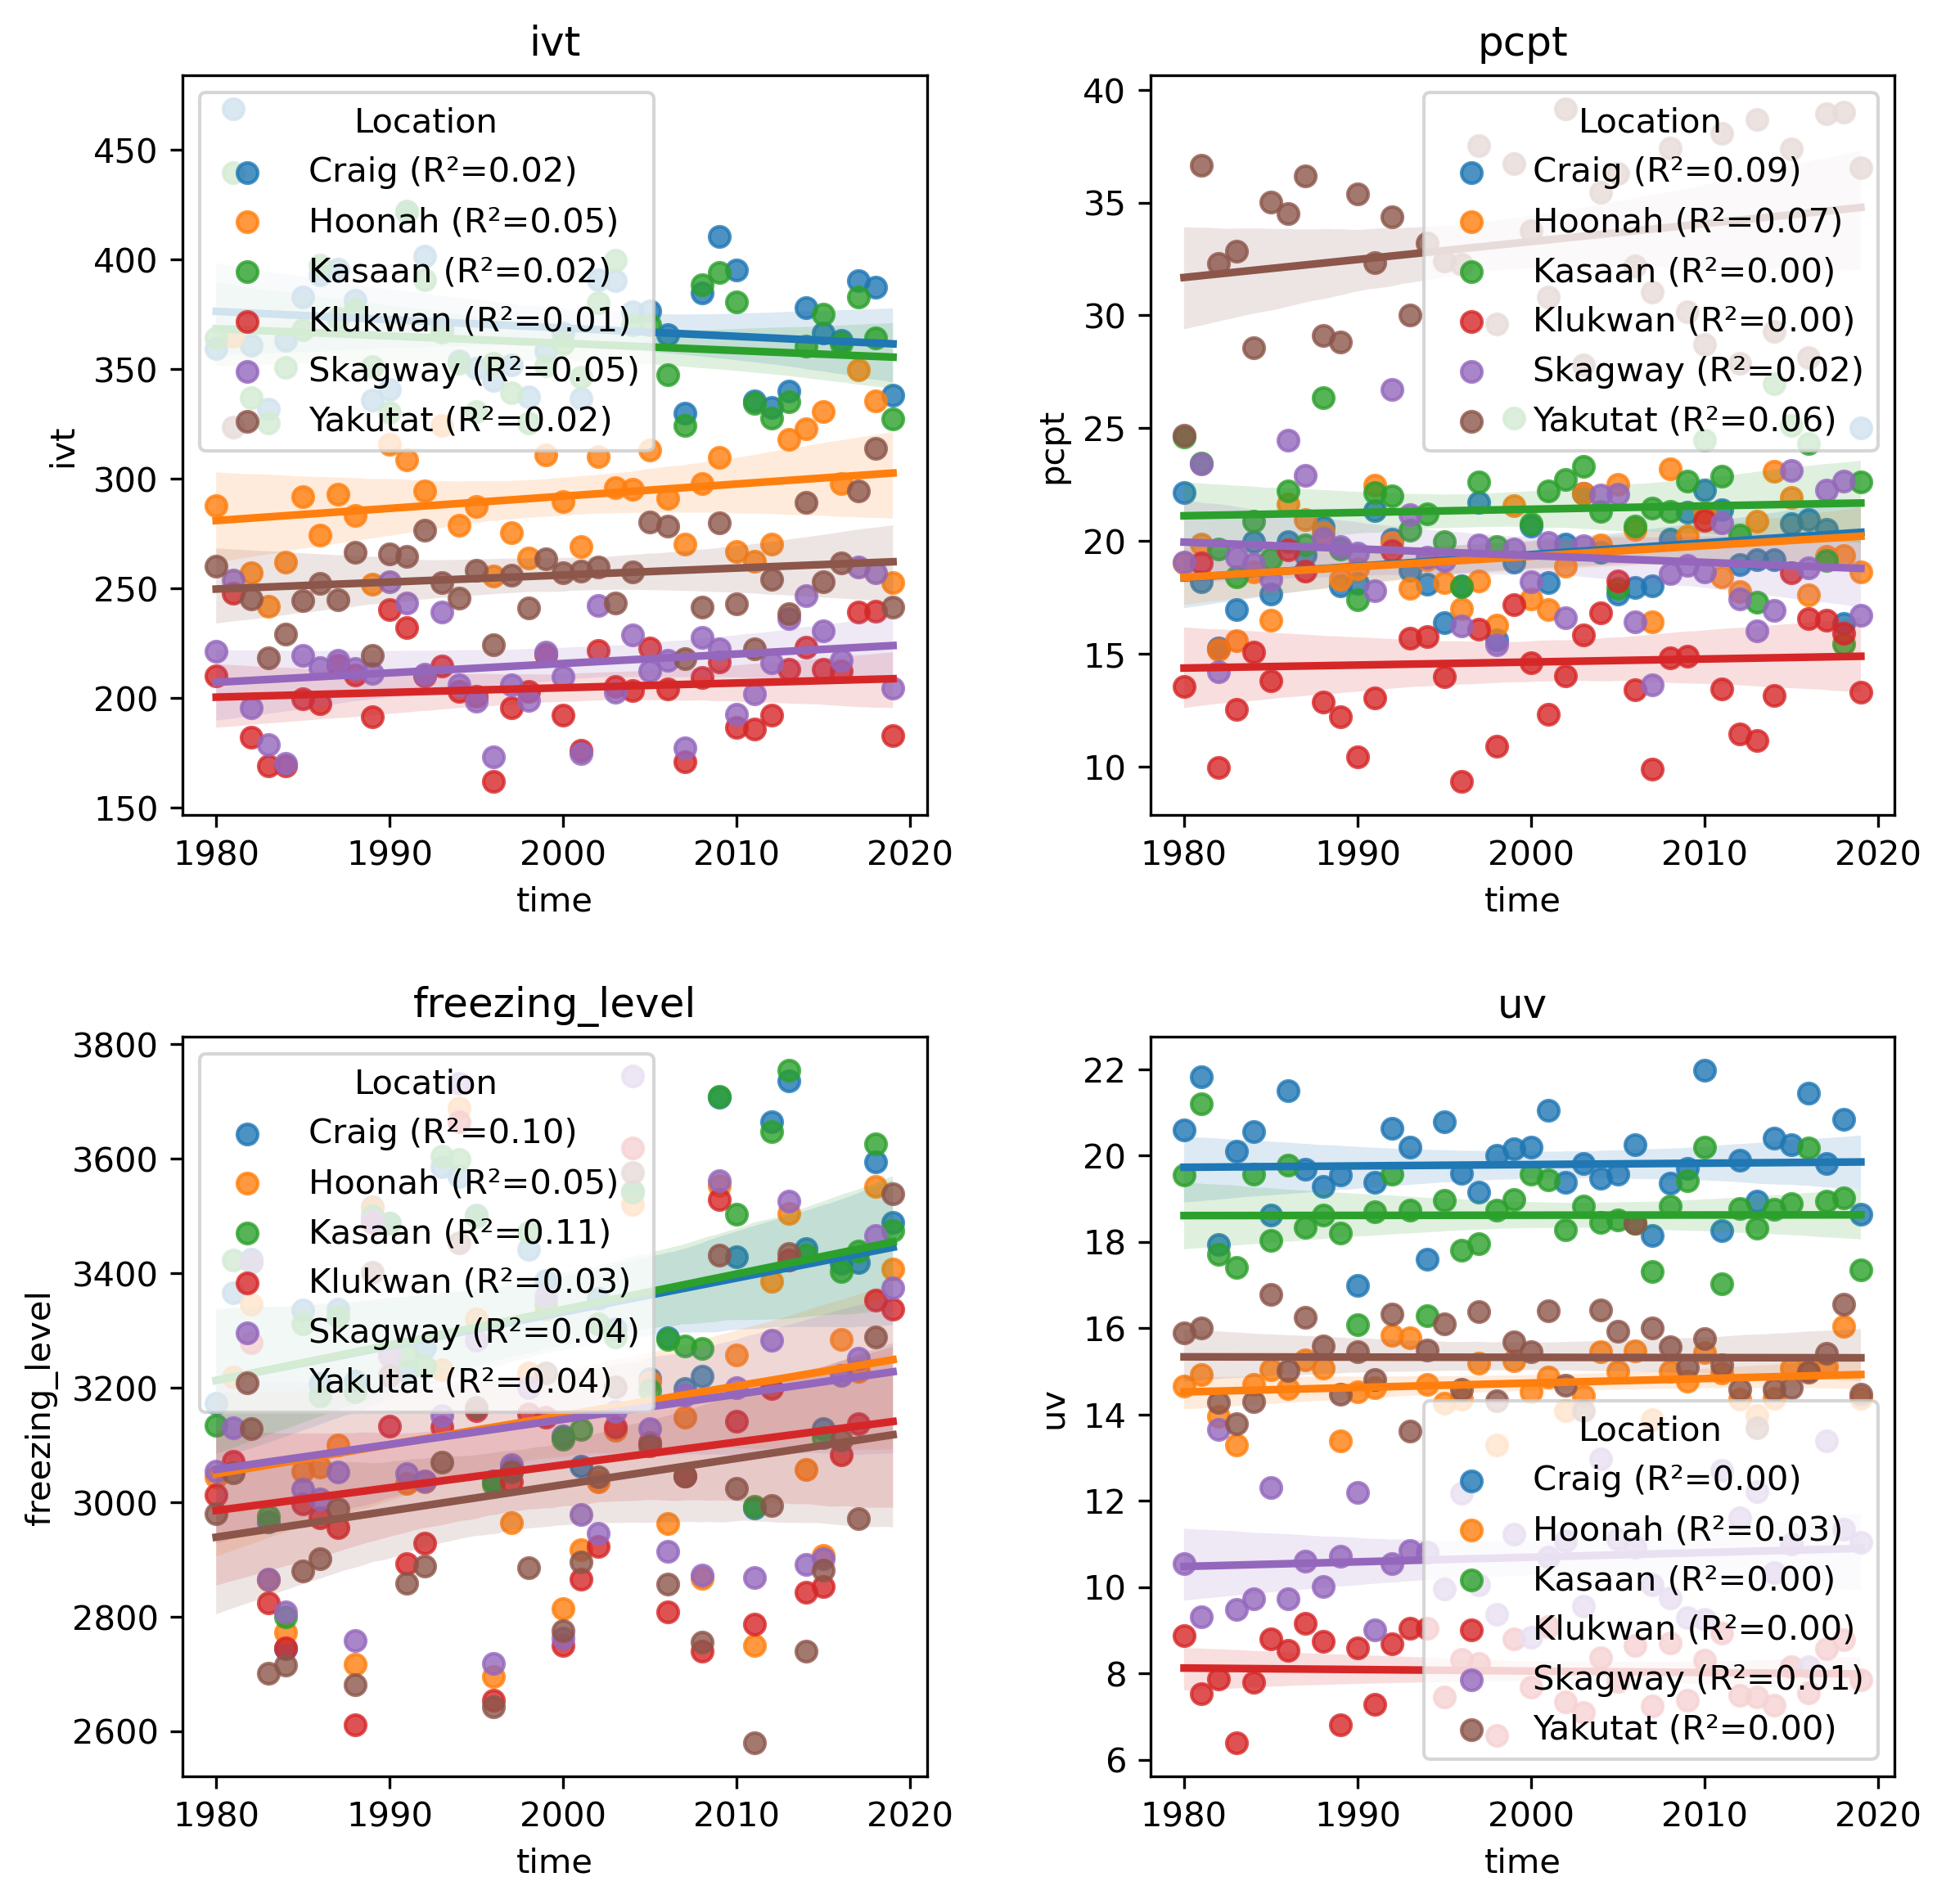

In [1]:
import sys, os
import numpy as np
import xarray as xr
import pandas as pd

import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Path to modules
sys.path.append('../modules/')
import globalvars
from wrf_utils import load_preprocessed_WRF_data, subset_wrf_ds

model = 'cfsr'
path_to_data = globalvars.path_to_data
varnames = ['ivt', 'pcpt', 'freezing_level', 'uv925']

df_lst = []
for varname in varnames:
    print(varname)
    # --- load data ---
    ds = load_preprocessed_WRF_data(model, varname, anomaly=False)
    
    # --- subset to community locations ---
    ds = subset_wrf_ds(ds)
    
    # --- compute 95th percentile for var for each year ---
    ds = ds.groupby("time.year").quantile(0.95, dim="time").rename(year="time")
    
    # --- change to tidy dataframe format ---
    df = ds.to_dataframe().reset_index()
    df_lst.append(df)

def add_regplot(ax, df, varname):
    xvar, yvar = "time", varname
    
    # Compute R² per location
    r2_dict = {}
    for loc, sub in df.groupby("location"):
        slope, intercept, r_value, p_value, std_err = linregress(sub[xvar], sub[yvar])
        r2_dict[loc] = r_value**2
        # plot regression line
        sns.regplot(
            data=sub, x=xvar, y=yvar,
            ax=ax, label=f"{loc} (R²={r2_dict[loc]:.2f})"
        )
    
    ax.legend(title="Location")
    ax.set_title(varname)
    return ax

# --- create figure with GridSpec ---
fig = plt.figure(figsize=(9, 9), dpi=300)
gs = GridSpec(2, 2, wspace=0.3, hspace=0.3)

for i, (varname, df) in enumerate(zip(varnames, df_lst)):
    row, col = divmod(i, 2)
    ax = fig.add_subplot(gs[row, col])
    if varname == "uv925":
        varname = "uv"
    add_regplot(ax, df, varname)

fig.savefig(f"../figs/{model}_lineplot_trend.png", bbox_inches="tight")
plt.show()




In [2]:
import pandas as pd

fname = '../figs/trend_lineplot_r2_full.csv'
df = pd.read_csv(fname)
df

,model,variable,location,R2
0,cfsr,ivt,Craig,0.02
1,cfsr,ivt,Hoonah,0.05
2,cfsr,ivt,Kasaan,0.02
3,cfsr,ivt,Klukwan,0.01
4,cfsr,ivt,Skagway,0.05
...,...,...,...,...
67,gfdl,uv,Hoonah,0.00
68,gfdl,uv,Kasaan,0.01
69,gfdl,uv,Klukwan,0.02
70,gfdl,uv,Skagway,0.02


In [3]:
# Create a pivot table with MultiIndex rows and columns
df_pivot_multi = df.pivot_table(index=['model', 'location'], columns='variable', values='R2')
print("\nDataFrame with MultiIndex Rows and Columns (from pivot_table):")
print(df_pivot_multi)


DataFrame with MultiIndex Rows and Columns (from pivot_table):
variable        freezing_level   ivt  pcpt    uv
model location                                  
ccsm  Craig               0.27  0.22  0.00  0.03
      Hoonah              0.16  0.23  0.08  0.02
      Kasaan              0.26  0.22  0.00  0.04
      Klukwan             0.11  0.20  0.04  0.08
      Skagway             0.12  0.24  0.03  0.01
      Yakutat             0.14  0.24  0.09  0.02
cfsr  Craig               0.10  0.02  0.09  0.00
      Hoonah              0.05  0.05  0.07  0.03
      Kasaan              0.11  0.02  0.00  0.00
      Klukwan             0.03  0.01  0.00  0.00
      Skagway             0.04  0.05  0.02  0.01
      Yakutat             0.04  0.02  0.06  0.00
gfdl  Craig               0.48  0.14  0.03  0.00
      Hoonah              0.64  0.15  0.04  0.00
      Kasaan              0.49  0.16  0.00  0.01
      Klukwan             0.62  0.16  0.00  0.02
      Skagway             0.61  0.12  0.00  0.02
     

In [4]:
df_pivot_multi

variable        freezing_level   ivt  pcpt    uv
model location                                  
ccsm  Craig               0.27  0.22  0.00  0.03
      Hoonah              0.16  0.23  0.08  0.02
      Kasaan              0.26  0.22  0.00  0.04
      Klukwan             0.11  0.20  0.04  0.08
      Skagway             0.12  0.24  0.03  0.01
      Yakutat             0.14  0.24  0.09  0.02
cfsr  Craig               0.10  0.02  0.09  0.00
      Hoonah              0.05  0.05  0.07  0.03
      Kasaan              0.11  0.02  0.00  0.00
      Klukwan             0.03  0.01  0.00  0.00
      Skagway             0.04  0.05  0.02  0.01
      Yakutat             0.04  0.02  0.06  0.00
gfdl  Craig               0.48  0.14  0.03  0.00
      Hoonah              0.64  0.15  0.04  0.00
      Kasaan              0.49  0.16  0.00  0.01
      Klukwan             0.62  0.16  0.00  0.02
      Skagway             0.61  0.12  0.00  0.02
      Yakutat             0.55  0.11  0.01  0.00